In [1]:
import os
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

/Users/lihuiyang/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
train_data_path = os.path.join(os.getcwd(), 'Data','PartC','e-cornellFinal.csv')
train = pd.read_csv(train_data_path, encoding='Latin-1')
test_data_path = os.path.join(os.getcwd(), 'Data','PartC','3cornell.csv')
test = pd.read_csv(test_data_path, encoding='Latin-1')

In [3]:
X_train=train.drop(['label'], axis=1) #features
y_train=train['label'] #targets
X_test=test.drop(['label'], axis=1) #features
y_test=test['label'] #targets

In [4]:
X_scaler = StandardScaler()
X_transform = X_scaler.fit_transform(X_train)  # Fit on training set only
X_transform_test = X_scaler.transform(X_test)  # Apply transform to both the training set and the test set

In [5]:
pca = PCA(n_components=3000, svd_solver='full')

X_pca_train = pca.fit_transform(X_train)   # fitting PCA on the training set only
X_pca_test = pca.transform(X_test)
print('train shape: {}'.format(X_pca_train.shape))
print('test shape: {}'.format(X_pca_test.shape))

train shape: (7414, 3000)
test shape: (867, 3000)


In [6]:
#format of TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vect = TfidfTransformer()
train_tfidf = tfidf_vect.fit_transform(X_pca_train)
test_tfidf = tfidf_vect.fit_transform(X_pca_test)

In [7]:
X_train_tfidf=train_tfidf.toarray()
X_test_tfidf=test_tfidf.toarray()

In [8]:
#KFold MultinomialNB accuracy_score f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(0,5):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        clf = MultinomialNB(alpha=i)
        clf.fit(X_train_k, y_train_k)  
        a=clf.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
    plt.plot(range(0,5),list_accuracy1)
    plt.xlabel("parameter")
    plt.ylabel("accuracy")
    plt.title('MNB parameter selection')
    plt.savefig('MultinomialNB_accuracy.png',dpi=100)
    plt.show()
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

ValueError: Input X must be non-negative

In [9]:
#KFold LogisticRegression accuracy_score f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)

list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
    
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))  
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))


# chnage multi_class parameter to the one-vs-rest (OvR) scheme that is suitable for the multiclass case

list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
    y_train_k, y_validation = y_train[train_la], y_train[valid_la]
    lr=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_k, y_train_k)  
    a=lr.predict(X_validation)
    
    f1_score=metrics.f1_score(y_validation, a, average='macro')
    accuracy=accuracy_score(y_validation, a)
    p = precision_score(y_validation, a, average='micro')
    R = recall_score(y_validation, a, average='micro')
        
    list_f1.append(f1_score)
    list_accuracy.append(accuracy)
    list_Precision.append(p)
    list_Recall.append(R)
    
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))  
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.7554676060602996
Average precision score Standard Deviation: 0.004511700056627931
Average recall score mean: 0.7554676060602996
Average recall score Standard Deviation: 0.004511700056627931
f1_score mean: 0.6195213808283423
f1_score Standard Deviation: 0.005543626470459287
accuracy mean: 0.7554676060602996
accuracy Standard Deviation: 0.004511700056627931
Average precision score mean: 0.739821875978403
Average precision score Standard Deviation: 0.0053624926013729176
Average recall score mean: 0.739821875978403
Average recall score Standard Deviation: 0.0053624926013729176
f1_score mean: 0.5982109557431994
f1_score Standard Deviation: 0.007168252416040727
accuracy mean: 0.739821875978403
accuracy Standard Deviation: 0.0053624926013729176


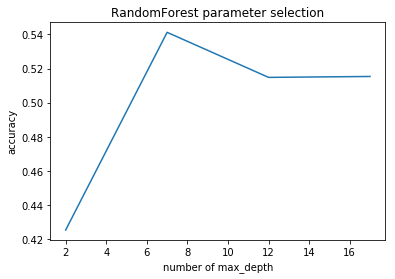

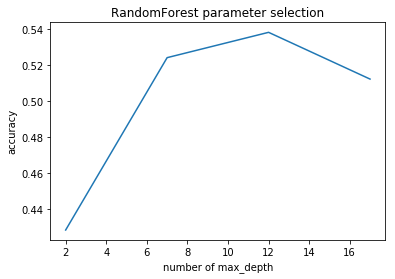

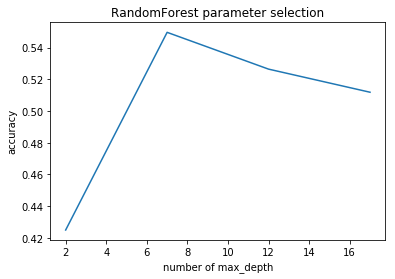

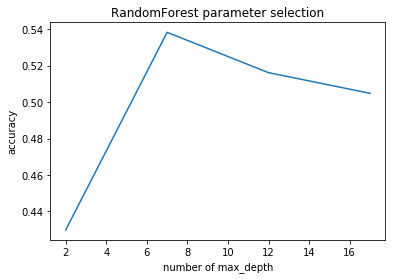

Average precision score mean: 0.5001016960300289
Average precision score Standard Deviation: 0.04374928513546517
Average recall score mean: 0.5001016960300289
Average recall score Standard Deviation: 0.04374928513546517
f1_score mean: 0.2561741450409539
f1_score Standard Deviation: 0.10015575811306027
accuracy mean: 0.5001016960300289
accuracy Standard Deviation: 0.04374928513546517


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(2,22,5):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=i, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(2,22,5),list_accuracy1)
    plt.xlabel("number of max_depth")
    plt.ylabel("accuracy")
    plt.title('RandomForest parameter selection')
#     plt.savefig('RandomForest_accuracy.png',dpi=100)
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):

        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        classifier = RandomForestClassifier(max_depth=10, random_state=0)
        classifier.fit(X_train_k, y_train_k)  
        a=classifier.predict(X_validation)
        
        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.5325048374577593
Average precision score Standard Deviation: 0.004014203933770763
Average recall score mean: 0.5325048374577593
Average recall score Standard Deviation: 0.004014203933770763
f1_score mean: 0.31029307034100473
f1_score Standard Deviation: 0.007556022006527111
accuracy mean: 0.5325048374577593
accuracy Standard Deviation: 0.004014203933770763


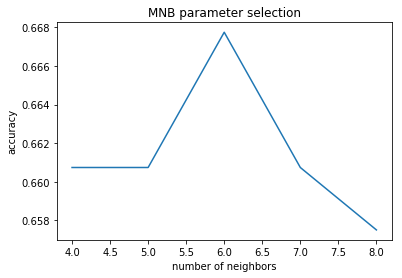

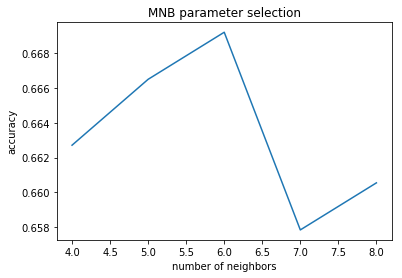

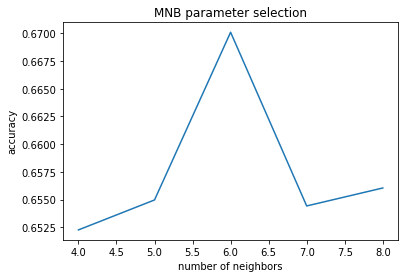

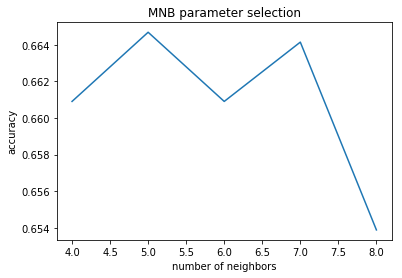

Average precision score mean: 0.6608300699365548
Average precision score Standard Deviation: 0.0050220502242215624
Average recall score mean: 0.6608300699365548
Average recall score Standard Deviation: 0.0050220502242215624
f1_score mean: 0.5155901077697613
f1_score Standard Deviation: 0.015371173018125059
accuracy mean: 0.6608300699365548
accuracy Standard Deviation: 0.0050220502242215624


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):
    list_accuracy1=[]
    for i in range(4,9):
        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
        
    plt.plot(range(4,9),list_accuracy1)
    plt.xlabel("number of neighbors")
    plt.ylabel("accuracy")
    plt.title('MNB parameter selection')
    plt.show()
        
print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
skf = StratifiedKFold(n_splits=4,random_state=0,shuffle=True)
list_f1=[]
list_accuracy=[]
list_Precision=[]
list_Recall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):

        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        neigh = KNeighborsClassifier(n_neighbors=6)
        neigh.fit(X_train_k, y_train_k)  
        a=neigh.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)

print('Average precision score mean:', np.mean(list_Precision))
print('Average precision score Standard Deviation:', np.std(list_Precision))
print('Average recall score mean:', np.mean(list_Recall))
print('Average recall score Standard Deviation:', np.std(list_Recall))     
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))

Average precision score mean: 0.666980574585828
Average precision score Standard Deviation: 0.0036046894067033137
Average recall score mean: 0.666980574585828
Average recall score Standard Deviation: 0.0036046894067033137
f1_score mean: 0.5220098772673321
f1_score Standard Deviation: 0.005598809391373585
accuracy mean: 0.666980574585828
accuracy Standard Deviation: 0.0036046894067033137


In [14]:

from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)

list_f1=[]
list_accuracy=[]
list_PrecisionRecall=[]

for train_la, valid_la in (skf.split(X_train_tfidf,y_train)):

        X_train_k, X_validation = X_train_tfidf[train_la], X_train_tfidf[valid_la]
        y_train_k, y_validation = y_train[train_la], y_train[valid_la]
        gnb = GaussianNB()
        gnb.fit(X_train_k, y_train_k)  
        a=gnb.predict(X_validation)

        f1_score=metrics.f1_score(y_validation, a, average='macro')
        accuracy=accuracy_score(y_validation, a)
        p = precision_score(y_validation, a, average='micro')
        R = recall_score(y_validation, a, average='micro')
        
        list_f1.append(f1_score)
        list_accuracy.append(accuracy)
        list_Precision.append(p)
        list_Recall.append(R)
        list_accuracy1.append(accuracy)
    
print('Average precision-recall score mean:', np.mean(list_Precision))
print('Average precision-recall score Standard Deviation:', np.std(list_Precision))
print('Average precision-recall score mean:', np.mean(list_Recall))
print('Average precision-recall score Standard Deviation:', np.std(list_Recall))
print('f1_score mean:', np.mean(list_f1))
print('f1_score Standard Deviation:', np.std(list_f1))
print('accuracy mean:', np.mean(list_accuracy))
print('accuracy Standard Deviation:', np.std(list_accuracy))



Average precision-recall score mean: 0.4263202541314712
Average precision-recall score Standard Deviation: 0.23460594106697316
Average precision-recall score mean: 0.4263202541314712
Average precision-recall score Standard Deviation: 0.23460594106697316
f1_score mean: 0.19255946805660556
f1_score Standard Deviation: 0.020150266652683827
accuracy mean: 0.1918104383263876
accuracy Standard Deviation: 0.008060196121504647
